<a href="https://colab.research.google.com/github/jestinakuruvila/AITraining_April24/blob/main/EY_ClassificationTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Complete the notebook to perform

# Data Exploration

# Feature Engineering

# Model Training and Evaluation to select the best model


In [2]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/EY8Apr2024-AI-Batch2/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail(3) # bottom 3 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df = data.iloc[ :, :]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
cors = df.corr()
cors

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

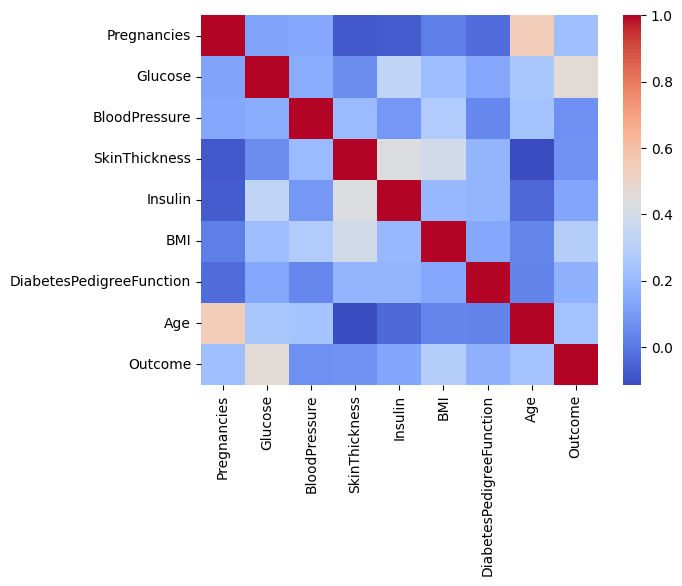

In [10]:
import seaborn as sns
sns.heatmap(cors, cmap = 'coolwarm')

In [12]:
df = data.iloc[:, :]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
y = df['Outcome']
x = df.iloc[:, :]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [15]:
xtrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
756,7,137,90,41,0,32.0,0.391,39,0
405,2,123,48,32,165,42.1,0.520,26,0
507,1,130,60,23,170,28.6,0.692,21,0
683,4,125,80,0,0,32.3,0.536,27,1
557,8,110,76,0,0,27.8,0.237,58,0


In [16]:
ytrain.head()

756    0
405    0
507    0
683    1
557    0
Name: Outcome, dtype: int64

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [18]:
predictions = model.predict(xtest)

In [19]:
predictions[:5]

array([ 1.00000000e+00, -1.59405496e-15,  1.00000000e+00,  4.96580741e-16,
        1.00000000e+00])

In [20]:
predictions.min(), predictions.max()

(-6.9702638233189e-15, 1.0000000000000053)

In [21]:
# calculate a threshold between min and max
threshold = ( predictions.max() + predictions.min()) / 2
threshold

0.49999999999999917

In [22]:

binary_logic = lambda val: 1 if val > threshold else 0
p = [ binary_logic(prediction) for prediction in predictions]
p[:5]

[1, 0, 1, 0, 1]

In [26]:
ytest[:5]

590    1
639    0
661    1
566    0
417    1
Name: Outcome, dtype: int64

In [27]:
p[:15]

[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]

In [28]:
ytest[:15]

590    1
639    0
661    1
566    0
417    1
490    0
564    0
290    0
4      1
573    0
153    0
462    0
508    0
151    0
408    1
Name: Outcome, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score
ascore = accuracy_score(p, ytest)

In [31]:
print('Linear regression accuracy was ' + str(ascore*100) + '%')

Linear regression accuracy was 100.0%
